## `diffuser`'s `DDPMScheduler`





In [9]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler(num_train_timesteps=1000, beta_start=0.0001, beta_end=0.02)
print("timesteps max and min:", scheduler.timesteps.max(), scheduler.timesteps.min())
print(scheduler.timesteps[:10])

timesteps max and min: tensor(999) tensor(0)
tensor([999, 998, 997, 996, 995, 994, 993, 992, 991, 990])


In [15]:
max(list(range(1000 - 1, -1, -1)))

999

betas max and min: tensor(0.0200) tensor(1.0000e-04)
tensor([1.0000e-04, 1.1992e-04, 1.3984e-04, 1.5976e-04, 1.7968e-04, 1.9960e-04,
        2.1952e-04, 2.3944e-04, 2.5936e-04, 2.7928e-04])


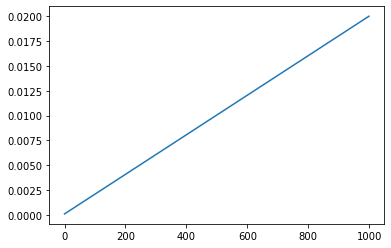

In [18]:
print("betas max and min:", scheduler.betas.max(), scheduler.betas.min())
print(scheduler.betas[:10])
# plot the curve
import matplotlib.pyplot as plt

plt.plot(scheduler.betas)
plt.show()

In [20]:
import torch

torch.linspace(1e-4, 0.02, 1000)[:10]

tensor([1.0000e-04, 1.1992e-04, 1.3984e-04, 1.5976e-04, 1.7968e-04, 1.9960e-04,
        2.1952e-04, 2.3944e-04, 2.5936e-04, 2.7928e-04])

alphas cumprod max and min: tensor(0.9999) tensor(4.0358e-05)


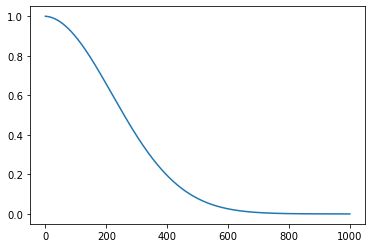

In [5]:
print("alphas cumprod max and min:", scheduler.alphas_cumprod.max(), scheduler.alphas_cumprod.min())
# plot the curve
plt.plot(scheduler.alphas_cumprod)
plt.show()


## LR Scheduler

/usr/lib/python3/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


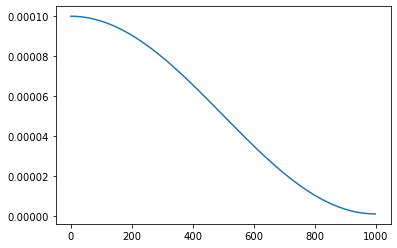

In [15]:
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

simple_net = torch.nn.Linear(10, 10)

total_steps = 1000
optimizer = torch.optim.AdamW(simple_net.parameters(), lr=7e-5)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=total_steps, eta_min=1e-6)

lr_list = []
# step the scheduler
for i in range(total_steps):
    lr_scheduler.step()
    lr_list.append(lr_scheduler.get_last_lr()[0])
    # print(lr_scheduler.get_last_lr()[0])

    # if i > 100:
    #     break

from matplotlib import pyplot as plt
plt.plot(lr_list)